# 📊 Analyse Big Data – Consommation Mobile des Clients Orange


Ce notebook vous guide dans l’analyse d’un jeu de données fictif représentant des clients Orange au Cameroun.

📁 Dataset : `dataset_clients_orange.csv`

Chaque ligne représente un client avec des informations sur sa consommation téléphonique et internet.

## 🎯 Objectifs
1. Explorer les données
2. Visualiser les comportements de consommation
3. Réaliser un clustering (KMeans)
4. Interpréter les résultats et proposer des recommandations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 📥 Chargement du Dataset

In [62]:
df = pd.read_csv("dataset_clients_orange.csv")
df.head()


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654


## 🔍 Analyse exploratoire

In [11]:
df.info()
df.describe()
df['forfait_type'].value_counts()
df['region'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        1000 non-null   int64 
 1   age              1000 non-null   int64 
 2   region           1000 non-null   object
 3   forfait_type     1000 non-null   object
 4   appels_min       1000 non-null   int64 
 5   data_mo          1000 non-null   int64 
 6   sms_envoyes      1000 non-null   int64 
 7   montant_facture  1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


region
Adamaoua      212
Sud-Ouest     208
Nord-Ouest    206
Littoral      196
Centre        178
Name: count, dtype: int64

## Vérification des valeurs manquantes, doublons


In [20]:
# Afficher le nombre de valeurs manquantes par colonne
df.isnull().sum()


client_id          0
age                0
region             0
forfait_type       0
appels_min         0
data_mo            0
sms_envoyes        0
montant_facture    0
dtype: int64

## repartition des clients par region et type de forfait

In [24]:
# Répartition des clients par région
repartition_region = df['region'].value_counts()

# Répartition des clients par type de forfait
repartition_forfait = df['forfait_type'].value_counts()

# Affichage des résultats
print('Répartition des clients par région :\n', repartition_region)
print('\nRépartition des clients par type de forfait :\n', repartition_forfait)

Répartition des clients par région :
 region
Adamaoua      212
Sud-Ouest     208
Nord-Ouest    206
Littoral      196
Centre        178
Name: count, dtype: int64

Répartition des clients par type de forfait :
 forfait_type
prépayé     704
postpayé    296
Name: count, dtype: int64


## 📊 Visualisations

Colonnes disponibles : Index(['client_id', 'age', 'region', 'forfait_type', 'appels_min', 'data_mo',
       'sms_envoyes', 'montant_facture', 'cluster', 'pca1', 'pca2'],
      dtype='object')


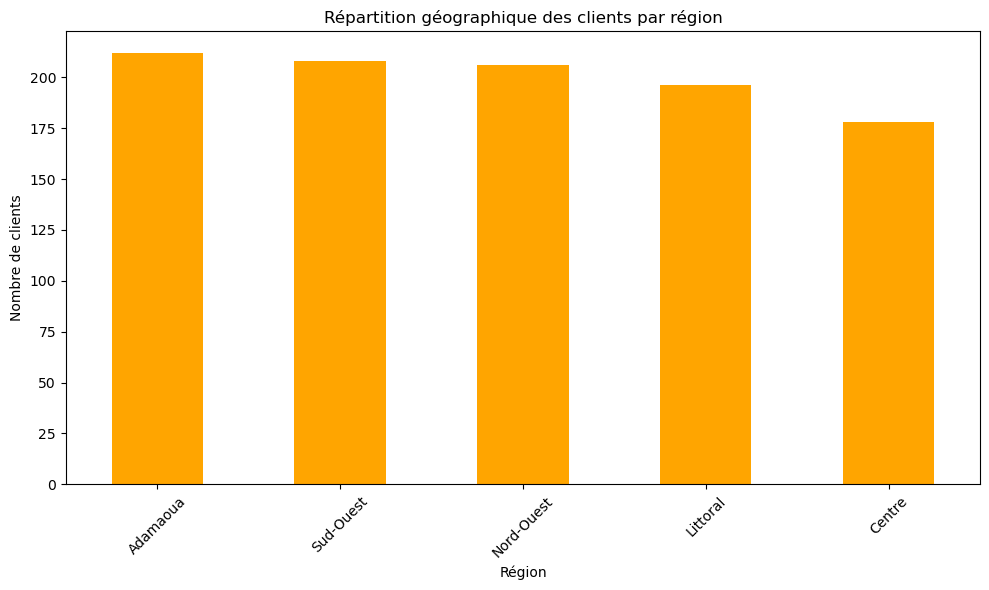

In [58]:
# Afficher les colonnes disponibles pour identifier celle des régions
print("Colonnes disponibles :", df.columns)

# Adapter le nom de la colonne en fonction de ton CSV
region_col = 'region'  # <-- remplace par le nom réel comme 'Région' si besoin

# S'assurer que la colonne existe
if region_col not in df.columns:
    raise ValueError(f"La colonne '{region_col}' n'existe pas.")

# Compter le nombre de clients par région
region_counts = df[region_col].value_counts()

# Tracer le bar chart
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='orange')  # ✅ LA BONNE VARIABLE est 'region_counts'
plt.title('Répartition géographique des clients par région')
plt.xlabel('Région')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

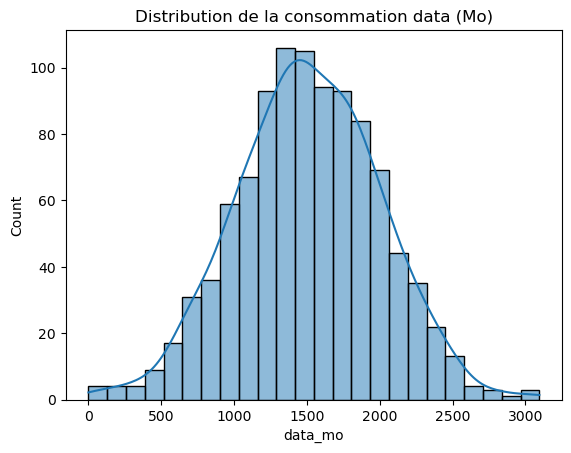

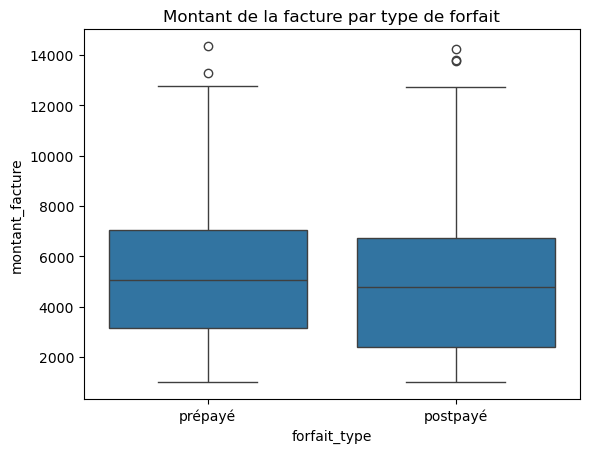

In [64]:
sns.histplot(df['data_mo'], kde=True)
plt.title("Distribution de la consommation data (Mo)")
plt.show()

sns.boxplot(x='forfait_type', y='montant_facture', data=df)
plt.title("Montant de la facture par type de forfait")
plt.show()




## ⚙️ Préparation des données pour le clustering

In [41]:
features = ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 📌 Clustering des clients (KMeans)

In [43]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters


## 🌀 Visualisation des clusters avec PCA

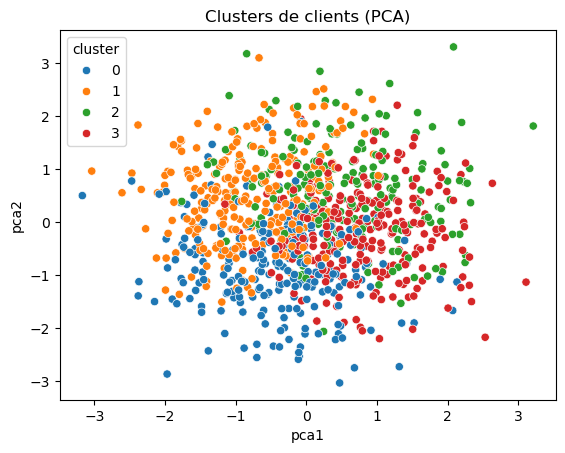

In [45]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Clusters de clients (PCA)")
plt.show()


## 💡 Recommandations stratégiques


- Identifier les groupes de clients à forte consommation data et faible facture
- Proposer des migrations de forfait pour certains clusters
- Créer des offres SMS personnalisées pour les clients intensifs en messages
